In [ ]:
#To Analyze event '5K RUN' data given on website 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
%matplotlib inline

from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup

In [139]:
from urllib.parse import urlparse
import nltk.data
from requests_html import HTMLSession

In [ ]:
#To connect the page using url

In [140]:
url= "https://www.hubertiming.com/results/2018GNG"
html=urlopen(url)
response = requests.get(url)

In [141]:
Soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
#To check the title of the page

In [142]:
title = Soup.title
print(title.text)

Race results for the 2018 Give n' Gobble!


In [ ]:
#To check the web links given on the page

In [143]:
links = Soup.find_all('a', href=True)
for link in links:
    print(link.get("href"))

http://www.givengobble.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018GNG10K
/results/2018GNG5kWalk
/results/summary/2018GNG
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [ ]:
#To check the 4th row(Header) of the table row 

In [144]:
allrows = Soup.find_all("tr")
print(allrows[4])

<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>


In [ ]:
#To check all rows of table

In [145]:
data =[]
allrows = Soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)

print (data[5:])

[['1', '1522', '\r\n\r\n                    RYAN JONES\r\n\r\n                ', 'M', '24', 'BEAVERTON', 'OR', '5:17', '16:25', '\r\n\r\n                    1 of 527\r\n\r\n                ', 'M 20-24', '\r\n\r\n                    1 of 37\r\n\r\n                ', '0:01', '16:26'], ['2', '1676', '\r\n\r\n                    ELI GILBERT\r\n\r\n                ', 'M', '17', 'COLBERT', 'WA', '5:30', '17:04', '\r\n\r\n                    2 of 527\r\n\r\n                ', 'M 15-19', '\r\n\r\n                    1 of 70\r\n\r\n                ', '0:00', '17:04'], ['3', '2096', '\r\n\r\n                    THERESA HAILEY\r\n\r\n                ', 'F', '29', 'PORTLAND', 'OR', '5:32', '17:10', '\r\n\r\n                    1 of 540\r\n\r\n                ', 'F 25-29', '\r\n\r\n                    1 of 63\r\n\r\n                ', '0:01', '17:11'], ['4', '1698', '\r\n\r\n                    THOMAS OSBORNE\r\n\r\n                ', 'M', '17', 'SHERWOOD', 'OR', '5:37', '17:24', '\r\n\r\n         

In [ ]:
#To add column name of the columns and check the dataframe

In [146]:
cols = ['Place','Bib', 'Name','Gender','Age','City','	State',	'Chip Pace',	'Time',	'Gender Place',	'Age Group',	'Age Group Place',	'Time to Start',	'Gun Time']

df = pd.DataFrame(data[5:],columns=cols)
print(df)

     Place   Bib                                               Name Gender  \
0        1  1522  \r\n\r\n                    RYAN JONES\r\n\r\n...      M   
1        2  1676  \r\n\r\n                    ELI GILBERT\r\n\r\...      M   
2        3  2096  \r\n\r\n                    THERESA HAILEY\r\n...      F   
3        4  1698  \r\n\r\n                    THOMAS OSBORNE\r\n...      M   
4        5   830  \r\n\r\n                    ISMAEL ALVARES\r\n...      M   
...    ...   ...                                                ...    ...   
1062  1063  2428  \r\n\r\n                    LINDA FLADWOOD\r\n...      F   
1063  1064  1151  \r\n\r\n                    HENRY BUTTON\r\n\r...      M   
1064  1065  1152  \r\n\r\n                    MARY BUTTON\r\n\r\...      F   
1065  1066  1149  \r\n\r\n                    MARTHA BUTTON\r\n\...      F   
1066  1067  1207  \r\n\r\n                    CADE COLLINS\r\n\r...      M   

     Age       City \tState Chip Pace     Time  \
0     24  BEA

In [ ]:
#To check the shape of the dataframe

In [147]:
df.shape

(1067, 14)

In [ ]:
#To consider tail(20) of the dataframe

In [148]:
df3=df.tail(20)

In [ ]:
#To check the dataframe

In [149]:
df3

,Place,Bib,Name,Gender,Age,City,\tState,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
1047,1048,368,\r\n\r\n MARY JO BERGIN\r\n...,F,61,SHERWOOD,OR,21:01,1:05:11,\r\n\r\n 530 of 540\r\n\r\n...,F 60-64,\r\n\r\n 11 of 14\r\n\r\n ...,0:00,1:05:11
1048,1049,2137,\r\n\r\n JOSEPH LOHNER\r\n\...,M,30,SAN DIEGO,CA,21:14,1:05:52,\r\n\r\n 519 of 527\r\n\r\n...,M 30-34,\r\n\r\n 29 of 29\r\n\r\n ...,3:33,1:09:25
1049,1050,809,\r\n\r\n TOM MELILLO\r\n\r\...,M,46,SHERWOOD,OR,21:22,1:06:14,\r\n\r\n 520 of 527\r\n\r\n...,M 45-49,\r\n\r\n 61 of 61\r\n\r\n ...,0:00,1:06:14
1050,1051,1606,\r\n\r\n OLIVIA LYONS\r\n\r...,F,13,WILSONVILLE,OR,21:44,1:07:24,\r\n\r\n 531 of 540\r\n\r\n...,F 10-14,\r\n\r\n 63 of 63\r\n\r\n ...,2:39,1:10:03
1051,1052,2160,\r\n\r\n MARK ANDERSON\r\n\...,M,35,KING CITY,OR,22:04,1:08:25,\r\n\r\n 521 of 527\r\n\r\n...,M 35-39,\r\n\r\n 35 of 35\r\n\r\n ...,0:00,1:08:25
1052,1053,2136,\r\n\r\n MICHELLE LOHNER\r\...,F,29,SAN DIEGO,CA,22:07,1:08:34,\r\n\r\n 532 of 540\r\n\r\n...,F 25-29,\r\n\r\n 63 of 63\r\n\r\n ...,3:33,1:12:07
1053,1054,2162,\r\n\r\n NORA ANDERSON\r\n\...,F,1,KING CITY,OR,22:08,1:08:38,\r\n\r\n 533 of 540\r\n\r\n...,F 9 and Under,\r\n\r\n 37 of 37\r\n\r\n ...,0:00,1:08:38
1054,1055,2161,\r\n\r\n EVAN ANDERSON\r\n\...,M,4,KING CITY,OR,22:08,1:08:39,\r\n\r\n 522 of 527\r\n\r\n...,M 9 and Under,\r\n\r\n 44 of 45\r\n\r\n ...,0:00,1:08:39
1055,1056,1262,\r\n\r\n WENDY DENHAM\r\n\r...,F,49,PORTLAND,OR,22:12,1:08:51,\r\n\r\n 534 of 540\r\n\r\n...,F 45-49,\r\n\r\n 67 of 67\r\n\r\n ...,0:00,1:08:51
1056,1057,2281,\r\n\r\n DALLEN JOLLEY\r\n\...,M,15,SHERWOOD,OR,22:40,1:10:17,\r\n\r\n 523 of 527\r\n\r\n...,M 15-19,\r\n\r\n 69 of 70\r\n\r\n ...,2:31,1:12:48


In [ ]:
#Bar Graph of last 20 runner on how Gender has performed in different Cities

Text(0.5, 1.0, 'Comparison between city and male and female')

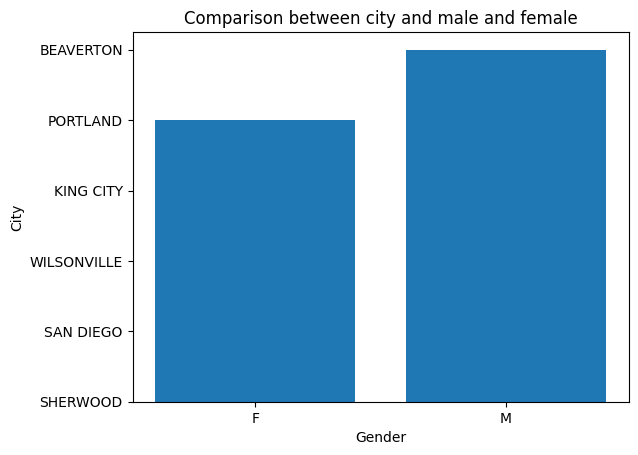

In [150]:
plt.bar(df3['Gender'],df3['City'])
plt.xlabel('Gender')
plt.ylabel('City')
plt.title("Comparison between city and male and female")  

In [ ]:
#The scatter plot is representing ages of last 20 runner across different cities

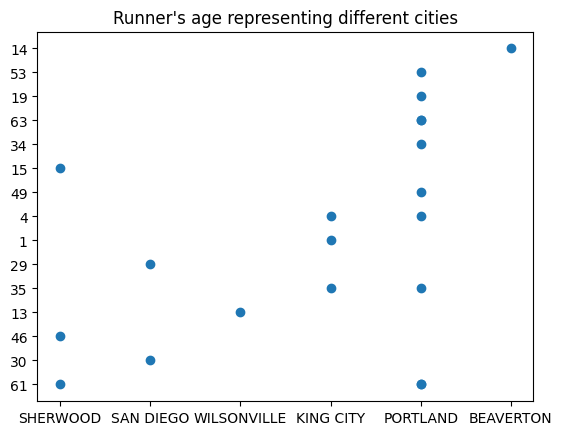

In [151]:
plt.scatter(df3['City'],df3['Age'])
plt.title("Runner's age representing different cities") 
plt.show()